To install basic libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("C:\\Users\\hp\\Desktop\\odin_projects\\corona_tested_006.csv",  low_memory=False)

In [4]:
df['Test_date'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y', errors='coerce')

In [5]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278596 non-null  object        
 3   Fever                278596 non-null  object        
 4   Sore_throat          278847 non-null  object        
 5   Shortness_of_breath  278847 non-null  object        
 6   Headache             278847 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         151528 non-null  object        
 9   Sex                  259285 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB
None


Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [6]:
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [7]:
#To remove ID as its not that necessary until we need to enquire him/her personally
df1= df[['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact' , 'Corona']]

In [8]:
# Assuming df1 is your DataFrame
df1['Cough_symptoms'] = df1['Cough_symptoms'].astype('category')
df1['Fever'] = df1['Fever'].astype('category')
df1['Sore_throat'] = df1['Sore_throat'].astype('category')
df1['Shortness_of_breath'] = df1['Shortness_of_breath'].astype('category')
df1['Headache'] = df1['Headache'].astype('category')
df1['Age_60_above'] = df1['Age_60_above'].astype('category')
df1['Sex'] = df1['Sex'].astype('category')
df1['Known_contact'] = df1['Known_contact'].astype('category')

# You can confirm the data types have changed with:
print(df1.dtypes)


Test_date              datetime64[ns]
Cough_symptoms               category
Fever                        category
Sore_throat                  category
Shortness_of_breath          category
Headache                     category
Age_60_above                 category
Sex                          category
Known_contact                category
Corona                         object
dtype: object


To impute categorical missing data with ' most frequent' value

In [9]:
from sklearn.impute import SimpleImputer
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact', 'Corona']
imputer = SimpleImputer(strategy='most_frequent')
df1[categorical_columns] = imputer.fit_transform(df1[categorical_columns])


In [10]:
# Define your categorical columns
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact', 'Corona']

# Function to apply random imputation
def random_impute(column):
    # Get the non-null values from the column
    non_null_values = column.dropna()
    
    # Randomly sample from the non-null values and fill NaNs
    return column.apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)

# Apply random imputation on each categorical column
df1[categorical_columns] = df1[categorical_columns].apply(random_impute, axis=0)


In [11]:
df1

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,2020-03-11,True,False,True,False,False,No,female,Abroad,negative
1,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
2,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
3,2020-03-11,True,False,False,False,False,No,female,Abroad,negative
4,2020-03-11,True,False,False,False,False,No,female,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,No,male,Other,positive
278844,2020-04-30,False,False,False,False,False,No,female,Other,negative
278845,2020-04-30,False,False,False,False,False,No,male,Other,negative
278846,2020-04-30,False,False,False,False,False,No,male,Other,negative


In [12]:
'''
from sklearn.impute import KNNImputer

# Load your DataFrame (assuming df1 is your DataFrame)
# df1 = pd.read_csv('your_data.csv')  # Example of loading data

# Specify the columns to impute
categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat',
                       'Shortness_of_breath', 'Headache', 
                       'Age_60_above', 'Sex', 'Known_contact', 'Corona']

# Convert categorical variables to numeric if necessary
df1[categorical_columns] = df1[categorical_columns].apply(pd.to_numeric, errors='coerce')

# Initialize the KNN imputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the data and transform it
df1_imputed = pd.DataFrame(imputer.fit_transform(df1[categorical_columns]), columns=categorical_columns)

# Replace original columns with the imputed columns
df1[categorical_columns] = df1_imputed

# Check for missing values after imputation
print(df1[categorical_columns].isnull().sum()) '''

# time complex 


"\nfrom sklearn.impute import KNNImputer\n\n# Load your DataFrame (assuming df1 is your DataFrame)\n# df1 = pd.read_csv('your_data.csv')  # Example of loading data\n\n# Specify the columns to impute\ncategorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat',\n                       'Shortness_of_breath', 'Headache', \n                       'Age_60_above', 'Sex', 'Known_contact', 'Corona']\n\n# Convert categorical variables to numeric if necessary\ndf1[categorical_columns] = df1[categorical_columns].apply(pd.to_numeric, errors='coerce')\n\n# Initialize the KNN imputer with 5 neighbors\nimputer = KNNImputer(n_neighbors=5)\n\n# Fit the imputer to the data and transform it\ndf1_imputed = pd.DataFrame(imputer.fit_transform(df1[categorical_columns]), columns=categorical_columns)\n\n# Replace original columns with the imputed columns\ndf1[categorical_columns] = df1_imputed\n\n# Check for missing values after imputation\nprint(df1[categorical_columns].isnull().sum()) "

In [13]:
print(df1.nunique())
df1.info()

Test_date              51
Cough_symptoms          2
Fever                   2
Sore_throat             2
Shortness_of_breath     2
Headache                2
Age_60_above            2
Sex                     2
Known_contact           3
Corona                  3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            278848 non-null  datetime64[ns]
 1   Cough_symptoms       278848 non-null  bool          
 2   Fever                278848 non-null  bool          
 3   Sore_throat          278848 non-null  bool          
 4   Shortness_of_breath  278848 non-null  bool          
 5   Headache             278848 non-null  bool          
 6   Age_60_above         278848 non-null  object        
 7   Sex                  278848 non-null  object        
 8   Known_contact        278848 non

To perform EDA on mapped data with imputed NoN-Null values

In [14]:
categorical_cols = ['Cough_symptoms', 'Fever', 'Sore_throat', 
                    'Shortness_of_breath', 'Headache', 
                    'Age_60_above', 'Sex', 'Known_contact', 'Corona']
mapping= df1[categorical_cols]

MAPPING OF DATA df1 for analysis 

'Yes': 1,                   'No': 0,

'male': 1,                  'female': 0,

'Abroad': 2,                'Other': 1,            'Contact with confirmed': 0,

'positive': 2,              'other': 1,             'negative': 0


In [15]:
# Define a dictionary for replacements to improve readability
replacements = {
    'Yes': 1,
    'No': 0,
    'male': 1,
    'female': 0,
    'True': 1,
    'False': 0,
    'Abroad': 2,
    'Other': 1,
    'Contact with confirmed': 0,
    'positive': 2,
    'other': 1,
    'negative': 0
}

# Apply the replacements across all columns in the mapping DataFrame
for column in mapping.columns:
    mapping[column] = mapping[column].replace(replacements)

# Optional: Display the first few rows to verify changes
mapping.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,True,False,True,False,False,0,0,2,0
1,False,True,False,False,False,0,0,2,2
2,False,True,False,False,False,0,0,2,2
3,True,False,False,False,False,0,0,2,0
4,True,False,False,False,False,0,0,0,0


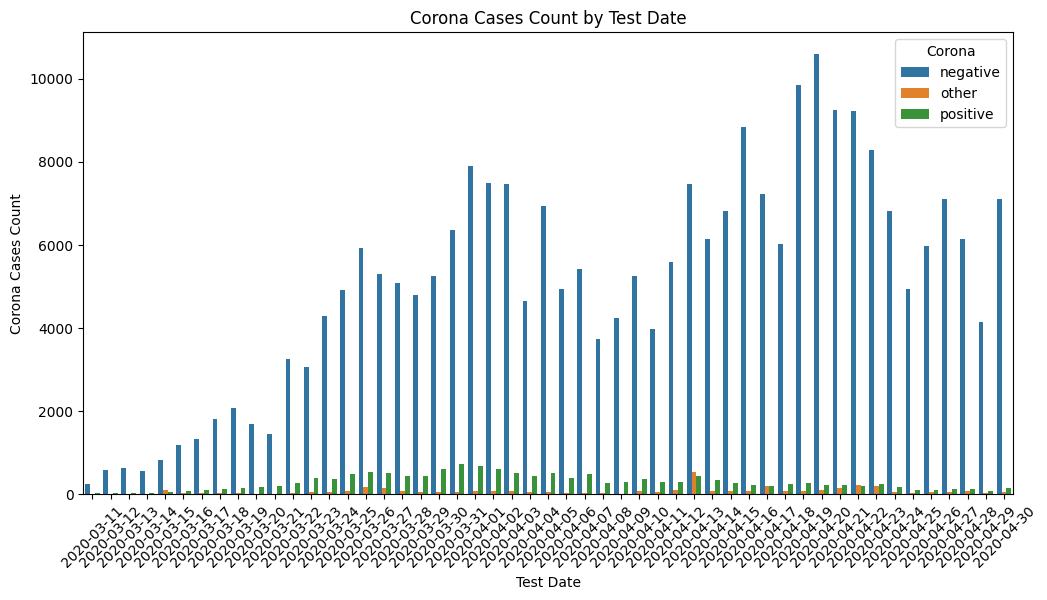

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Test_date' to datetime format if not already done
df1['Test_date'] = pd.to_datetime(df1['Test_date'])

# Group by 'Test_date' and count the occurrences of each 'Corona' status
df_counts = df1.groupby(['Test_date', 'Corona']).size().reset_index(name='counts')

# Plot the bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Test_date', y='counts', hue='Corona', data=df_counts)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Test Date')
plt.ylabel('Corona Cases Count')
plt.title('Corona Cases Count by Test Date')

# Display the plot
plt.show()


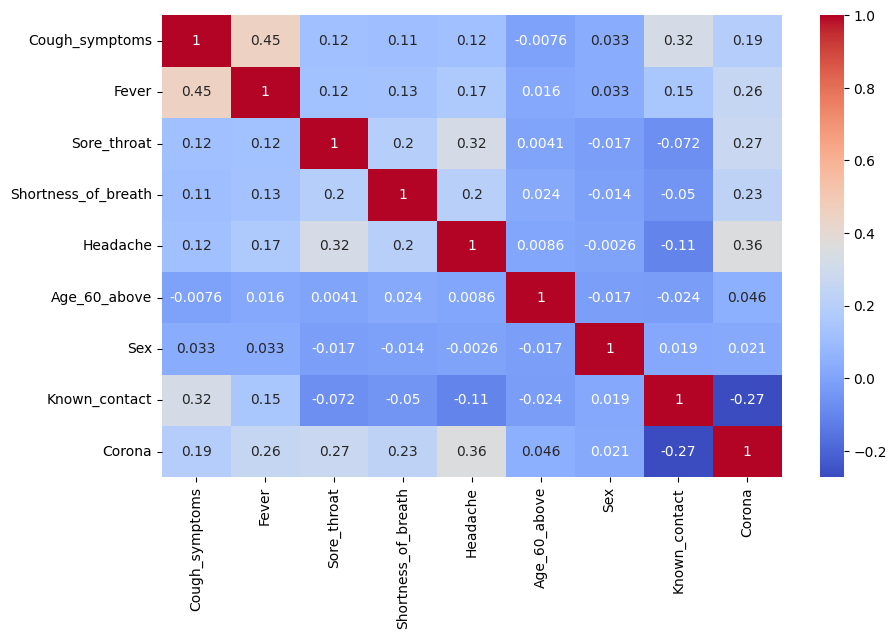

In [17]:

plt.figure(figsize=(10, 6))
correlation = mapping.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


1) Fever is related more to Cough symptoms 
2) Known contacts may have cough symptoms
3) if anyone knows someone being a corona poistive its less chance of him getting corona.
4) Cough symptoms were easily predicting if he being a known contact of corona people.
5) headache was also a prime symptom of corona.
6) if sore throat was related to corona , its not necessary of him being cough.

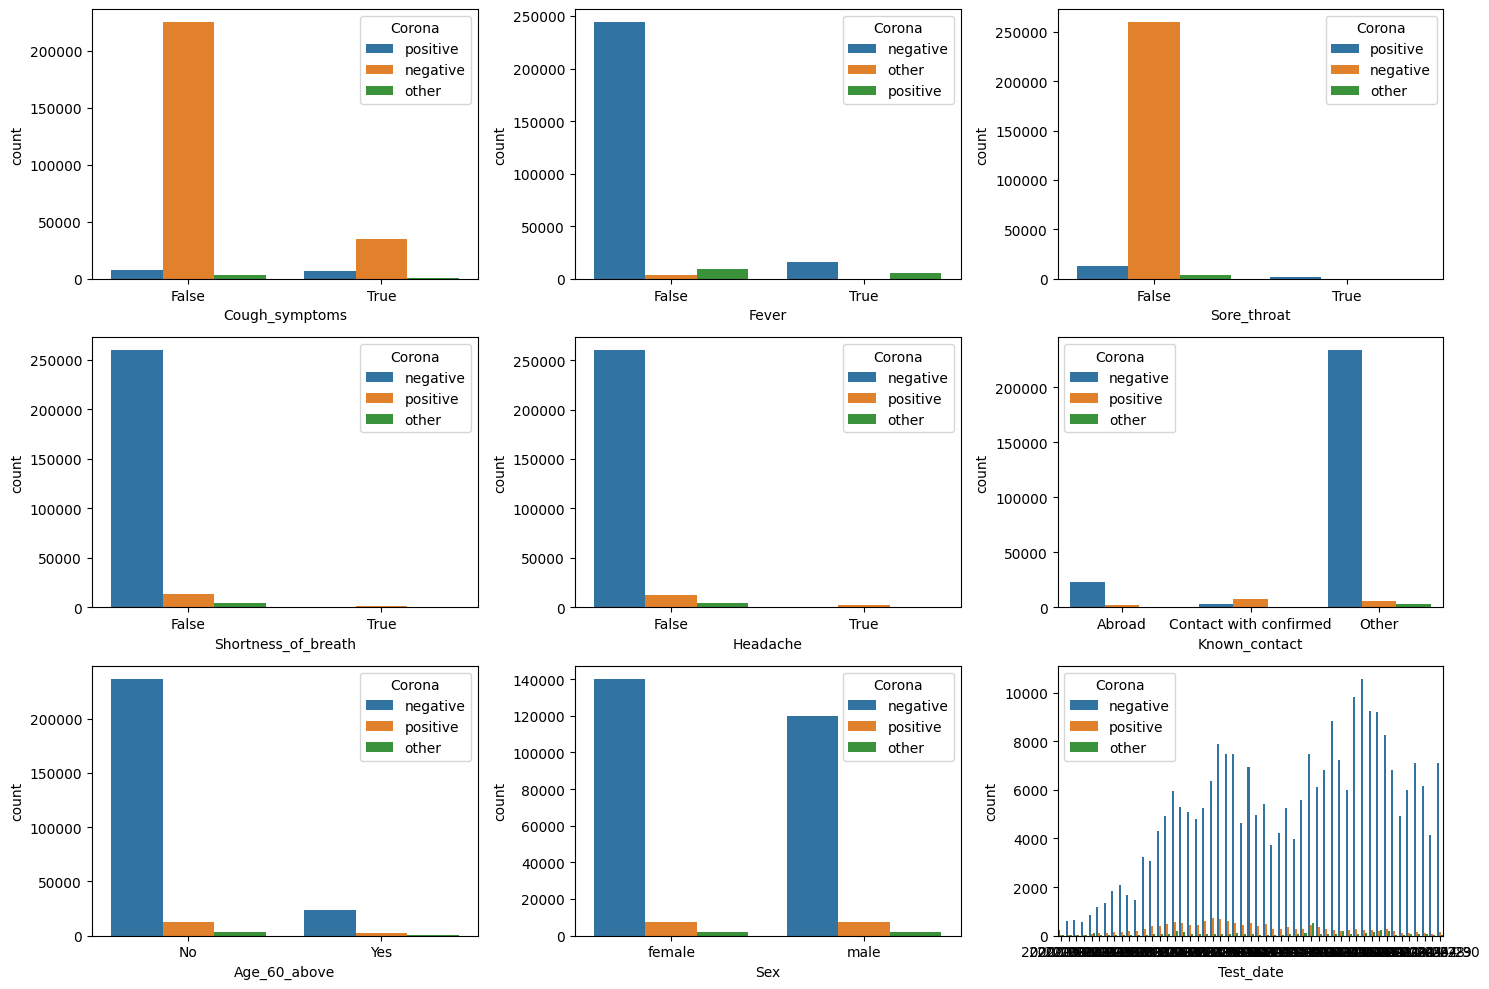

In [18]:
# Plotting the distribution of categorical features against Corona
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(ax=axes[0,0], x='Cough_symptoms', hue='Corona', data=df1)
sns.countplot(ax=axes[0,1], x='Fever', hue='Corona', data=df1)
sns.countplot(ax=axes[0,2], x='Sore_throat', hue='Corona', data=df1)
sns.countplot(ax=axes[1,0], x='Shortness_of_breath', hue='Corona', data=df1)
sns.countplot(ax=axes[1,1], x='Headache', hue='Corona', data=df1)
sns.countplot(ax=axes[1,2], x='Known_contact', hue='Corona', data=df1)
sns.countplot(ax=axes[2,0], x='Age_60_above', hue='Corona', data=df1)
sns.countplot(ax=axes[2,1], x='Sex', hue='Corona', data=df1)
sns.countplot(ax=axes[2,2], x='Test_date', hue='Corona', data=df1)

plt.tight_layout()
plt.show()


In [19]:
df1.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact', 'Corona'],
      dtype='object')

inferences : 
1) with time  people were getting  negatively reported 
2) people with age > 60 have less chance of  getting positive than people with age <60.
3) people who were in contact with corona positive people symptomed to be corona positive than rest. 

Cough_symptoms

H₀: Having cough symptoms is independent of contracting COVID-19.

H₁: Having cough symptoms is associated with contracting COVID-19.

Fever

H₀: Having a fever is independent of contracting COVID-19.

H₁: Having a fever is associated with contracting COVID-19.


Sore_throat

H₀: Having a sore throat is independent of contracting COVID-19.

H₁: Having a sore throat is associated with contracting COVID-19.


Shortness_of_breath

H₀: Having shortness of breath is independent of contracting COVID-19.

H₁: Having shortness of breath is associated with contracting COVID-19.


Headache

H₀: Having a headache is independent of contracting COVID-19.

H₁: Having a headache is associated with contracting COVID-19.


Age_60_above

H₀: The likelihood of contracting COVID-19 is independent of being aged 60 or above.

H₁: People aged 60 or above are more likely to contract COVID-19.


Sex

H₀: Gender (Male/Female) is independent of contracting COVID-19.

H₁: Gender is associated with the likelihood of contracting COVID-19.


Known_contact

H₀: Being in contact with a known COVID-19 case is independent of contracting COVID-19.

H₁: Being in contact with a known COVID-19 case increases the likelihood of contracting COVID-19.


In [20]:
import pandas as pd
import scipy.stats as stats

# Hypothesis testing on each categorical variable
def perform_chi_square_test(var1, var2, df):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    if p_value < 0.05:
        return f"Reject H0 for {var1} and {var2}. P-value: {p_value}"
    else:
        return f"Fail to reject H0 for {var1} and {var2}. P-value: {p_value}"

# List of variables
variables = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 
             'Headache', 'Age_60_above', 'Sex', 'Known_contact']

# Testing each variable against 'Corona'
for var in variables:
    result = perform_chi_square_test(var, 'Corona', df1)
    print(result)


Reject H0 for Cough_symptoms and Corona. P-value: 0.0
Reject H0 for Fever and Corona. P-value: 0.0
Reject H0 for Sore_throat and Corona. P-value: 0.0
Reject H0 for Shortness_of_breath and Corona. P-value: 0.0
Reject H0 for Headache and Corona. P-value: 0.0
Reject H0 for Age_60_above and Corona. P-value: 3.342594626754877e-133
Reject H0 for Sex and Corona. P-value: 1.5375629573328895e-31
Reject H0 for Known_contact and Corona. P-value: 0.0


In [21]:
X =df1[['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex',
       'Known_contact']]
Y= df1["Corona"]

In [22]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

In [23]:
'''
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    lr, 
    n_features_to_select=5,  # Number of features you want to select
    direction='forward',  # Use 'backward' for backward selection
    scoring='accuracy',
    cv=5  # Cross-validation
)

# Fit the SFS on the training data
sfs.fit(X_train, Y_train)

# Get the selected features
selected_features = X.columns[sfs.get_support()]
print(f"Selected features: {selected_features}")

'''     
#computaional error


'\n# Initialize the Logistic Regression model\nlr = LogisticRegression()\n\n# Initialize Sequential Feature Selector\nsfs = SequentialFeatureSelector(\n    lr, \n    n_features_to_select=5,  # Number of features you want to select\n    direction=\'forward\',  # Use \'backward\' for backward selection\n    scoring=\'accuracy\',\n    cv=5  # Cross-validation\n)\n\n# Fit the SFS on the training data\nsfs.fit(X_train, Y_train)\n\n# Get the selected features\nselected_features = X.columns[sfs.get_support()]\nprint(f"Selected features: {selected_features}")\n\n'

In [24]:
df.isnull().sum()  # have null valeus 
df1.isnull().sum() # has no null values

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Age_60_above           0
Sex                    0
Known_contact          0
Corona                 0
dtype: int64

To perform One-Hot Encoding on df1 Not-null values for ML modelling 

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df_imputed is your DataFrame
X = df1.drop(columns=['Test_date', 'Corona']) 

# Define categorical columns
categorical_cols = ['Cough_symptoms', 'Fever', 'Sore_throat', 
                    'Shortness_of_breath', 'Headache', 
                    'Age_60_above', 'Sex', 'Known_contact']

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

# Ensure columns are of category type
X[categorical_cols] = X[categorical_cols].astype('category')

# One-hot encoding
encoder = OneHotEncoder( sparse_output=True)
X_encoded = encoder.fit_transform(X)

# Get the new column names
encoded_feature_names = encoder.get_feature_names_out()

# Create a DataFrame from the sparse matrix
X_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_encoded, columns=encoded_feature_names)

# Now, X_encoded_df is your one-hot encoded DataFrame
X_encoded_df.head()


,Cough_symptoms_0.0,Cough_symptoms_1.0,Fever_0.0,Fever_1.0,Sore_throat_0.0,Sore_throat_1.0,Shortness_of_breath_0.0,Shortness_of_breath_1.0,Headache_0.0,Headache_1.0,Age_60_above_No,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other
0,0,1.0,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0
1,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0
2,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0
3,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0
4,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,1.0,0


In [26]:
df1

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,2020-03-11,True,False,True,False,False,No,female,Abroad,negative
1,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
2,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
3,2020-03-11,True,False,False,False,False,No,female,Abroad,negative
4,2020-03-11,True,False,False,False,False,No,female,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,No,male,Other,positive
278844,2020-04-30,False,False,False,False,False,No,female,Other,negative
278845,2020-04-30,False,False,False,False,False,No,male,Other,negative
278846,2020-04-30,False,False,False,False,False,No,male,Other,negative


In [27]:
# Dataframe to be used for ML modelling
test_date_df = pd.DataFrame(df1["Test_date"])
# Convert Y to a DataFrame
y_df = pd.DataFrame(Y, columns=["Corona"])
# Concatenate X_encoded_df and y_df along the columns
ml_df = pd.concat([X_encoded_df, y_df], axis=1)
# Concatenate Test_date as the first column
ml_df = pd.concat([test_date_df, ml_df], axis=1)

ml_df.head()



,Test_date,Cough_symptoms_0.0,Cough_symptoms_1.0,Fever_0.0,Fever_1.0,Sore_throat_0.0,Sore_throat_1.0,Shortness_of_breath_0.0,Shortness_of_breath_1.0,Headache_0.0,Headache_1.0,Age_60_above_No,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Corona
0,2020-03-11,0,1.0,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,negative
1,2020-03-11,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,positive
2,2020-03-11,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,positive
3,2020-03-11,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,negative
4,2020-03-11,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,1.0,0,negative


To imply feature selection to get best features for analysis

In [28]:
#pip install imbalanced-learn


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

X = mapping.drop(columns=["Corona"])  # Drop target column
Y = mapping["Corona"]

# Initialize the Random Forest model
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

k = 5
selector = SelectKBest(score_func=f_classif, k=k)

# Fit SelectKBest
selector.fit(X, Y)

# Get the mask of selected features
mask = selector.get_support()

# Get selected features from SelectKBest
accepted_features_kbest = X.columns[mask].to_list()
print("Selected features from SelectKBest:", accepted_features_kbest)


Selected features from SelectKBest: ['Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']


to define the data into train, validation and test set to  AVOID DATA LEAKAGE

In [30]:
# Define the date ranges
train_val_start =   '2020-03-11'
train_val_end =     '2020-04-15'
test_start =        '2020-04-16'
test_end =          '2020-04-30'

# Create training and validation set
train_val_set = ml_df[(ml_df['Test_date'] >= train_val_start) & (ml_df['Test_date'] <= train_val_end)]

# Create test set
test_set = ml_df[(ml_df['Test_date'] >= test_start) & (ml_df['Test_date'] <= test_end)]


# Split the training and validation set into 4:1 ratio
train_set = train_val_set.sample(frac=0.8, random_state=123)  # 80% for training
val_set = train_val_set.drop(train_set.index)  # Remaining 20% for validation

# Print the sizes of each set
print(f"Training Set Size: {train_set.shape[0]}")
print(f"Validation Set Size: {val_set.shape[0]}")
print(f"Test Set Size: {test_set.shape[0]}")


Training Set Size: 130551
Validation Set Size: 32638
Test Set Size: 115659


In [31]:
test_set.head(3)

,Test_date,Cough_symptoms_0.0,Cough_symptoms_1.0,Fever_0.0,Fever_1.0,Sore_throat_0.0,Sore_throat_1.0,Shortness_of_breath_0.0,Shortness_of_breath_1.0,Headache_0.0,Headache_1.0,Age_60_above_No,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Corona
163189,2020-04-16,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,negative
163190,2020-04-16,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,0,1.0,negative
163191,2020-04-16,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,negative


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

X_train = train_set.drop(columns=['Test_date', 'Corona']) 
y_train = train_set['Corona']  

X_val = val_set.drop(columns=['Test_date', 'Corona']) 
y_val = val_set['Corona']

smote = SMOTE(random_state=123)


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled = pd.Series(y_train_resampled)

log_reg = LogisticRegression()

log_reg.fit(X_train_resampled, y_train_resampled)

val_predictions = log_reg.predict(X_val)
logreg_initial_accuracy= accuracy_score(y_val, val_predictions)

print(classification_report(y_val, val_predictions))
logreg_initial_accuracy

              precision    recall  f1-score   support

    negative       0.96      0.46      0.62     29743
       other       0.02      0.50      0.03       499
    positive       0.46      0.74      0.57      2396

    accuracy                           0.48     32638
   macro avg       0.48      0.57      0.41     32638
weighted avg       0.91      0.48      0.61     32638



0.48311783810282494

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

X_train = train_set.drop(columns=['Test_date', 'Corona']) 
y_train = train_set['Corona']  

X_val = val_set.drop(columns=['Test_date', 'Corona']) 
y_val = val_set['Corona']

train_fraction = 0.3  # Adjust this value to select the fraction of data (e.g., 30%)  due to computational error
X_train_sampled = X_train.sample(frac=train_fraction, random_state=123)
y_train_sampled = y_train.loc[X_train_sampled.index]  

 
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sampled, y_train_sampled)

 
rf_smote = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=123)
rf_smote.fit(X_train_resampled, y_train_resampled)


val_predictions_smote = rf_smote.predict(X_val)


print("Random Forest with SMOTE on sampled data:")
print(classification_report(y_val, val_predictions_smote))

smote_rf_accuracy= accuracy_score(y_val, val_predictions_smote)
smote_rf_accuracy

Random Forest with SMOTE on sampled data:
              precision    recall  f1-score   support

    negative       0.96      0.43      0.59     29743
       other       0.02      0.51      0.03       499
    positive       0.41      0.80      0.54      2396

    accuracy                           0.45     32638
   macro avg       0.46      0.58      0.39     32638
weighted avg       0.91      0.45      0.58     32638



0.45422513634413875

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

X_train = train_set.drop(columns=['Test_date', 'Corona']) 
y_train = train_set['Corona']  

X_val = val_set.drop(columns=['Test_date', 'Corona']) 
y_val = val_set['Corona']
# Step 1: Sample a fraction of the training set to reduce computational load
train_fraction = 0.3  # Adjust this value to select the fraction of data (e.g., 30%)
X_train_sampled = X_train.sample(frac=train_fraction, random_state=123)
y_train_sampled = y_train.loc[X_train_sampled.index]  # Align y_train with sampled X_train

# Step 2: Train a Random Forest model on the sampled (non-SMOTE) data
rf_no_smote = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=123)
rf_no_smote.fit(X_train_sampled, y_train_sampled)

# Step 3: Evaluate the model on the validation set
val_predictions_no_smote = rf_no_smote.predict(X_val)

# Step 4: Print the classification report for the non-SMOTE model
print("Random Forest without SMOTE on sampled data:")
print(classification_report(y_val, val_predictions_no_smote))

no_smote_rf_accuracy= accuracy_score(y_val, val_predictions_no_smote)
no_smote_rf_accuracy

Random Forest without SMOTE on sampled data:
              precision    recall  f1-score   support

    negative       0.97      0.78      0.87     29743
       other       0.02      0.13      0.03       499
    positive       0.39      0.81      0.52      2396

    accuracy                           0.77     32638
   macro avg       0.46      0.57      0.47     32638
weighted avg       0.91      0.77      0.83     32638



0.7739751210245726

              precision    recall  f1-score   support

    Negative       0.97      0.85      0.91     52046
       Other       0.02      0.08      0.03       778
    Positive       0.35      0.76      0.48      2946

    accuracy                           0.83     55770
   macro avg       0.45      0.56      0.47     55770
weighted avg       0.93      0.83      0.87     55770

Accuracy: 0.8309126770665233


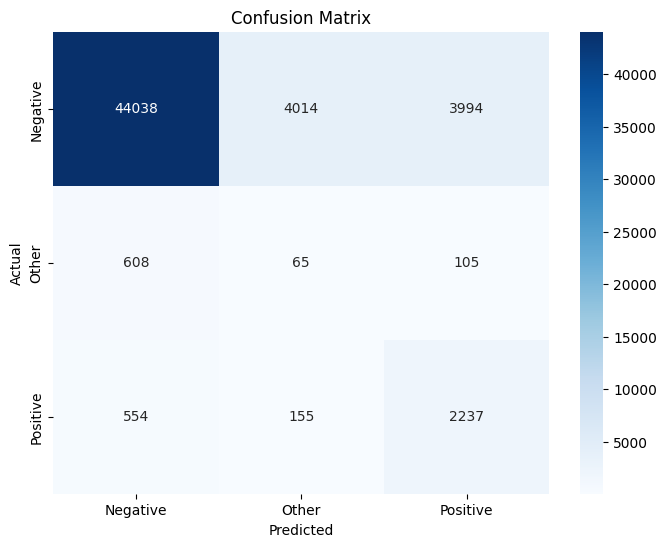

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have mapping prepared
X = mapping.drop(columns=["Corona"])  # Drop target column
Y = mapping["Corona"].replace({"positive": 2, "other": 1, "negative": 0})  # Convert target to binary

# Step 1: Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=123)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Step 3: Initialize the Random Forest model
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Train the model on the resampled data
rf.fit(X_train_resampled, Y_train_resampled)

# Step 4: Evaluate the model on the test data
Y_pred = rf.predict(X_test)
mapped_smote_rf_accuracy =accuracy_score(Y_test, Y_pred)
# Print classification report
print(classification_report(Y_test, Y_pred, target_names=["Negative", "Other", "Positive"]))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")

# Step 5: Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Other", "Positive"], yticklabels=["Negative", "Other", "Positive"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Random Forest without SMOTE:
              precision    recall  f1-score   support

    Negative       0.97      0.85      0.91     52046
       Other       0.02      0.09      0.03       778
    Positive       0.35      0.76      0.48      2946

    accuracy                           0.83     55770
   macro avg       0.45      0.56      0.47     55770
weighted avg       0.93      0.83      0.87     55770

Accuracy: 0.830518199748969


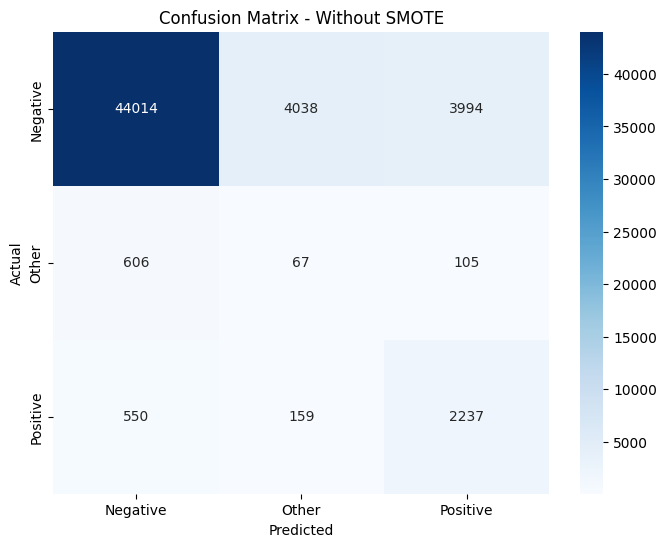

In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = mapping.drop(columns=["Corona"])  # Drop target column
Y = mapping["Corona"].replace({"positive": 2, "other": 1, "negative": 0})  # Convert target to binary

# Step 1: Split the data into training and test sets (without SMOTE)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

# Step 2: Initialize the Random Forest model (No SMOTE)
rf_no_smote = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Step 3: Train the model on the original training data (without SMOTE)
rf_no_smote.fit(X_train, Y_train)

# Step 4: Evaluate the model on the test data
Y_pred_no_smote = rf_no_smote.predict(X_test)
no_smote_rf_accuracy = accuracy_score(Y_test, Y_pred_no_smote)

# Print classification report
print("Random Forest without SMOTE:")
print(classification_report(Y_test, Y_pred_no_smote, target_names=["Negative", "Other", "Positive"]))
print(f"Accuracy: {no_smote_rf_accuracy}")

# Step 5: Generate confusion matrix
cm_no_smote = confusion_matrix(Y_test, Y_pred_no_smote)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_smote, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Other", "Positive"], yticklabels=["Negative", "Other", "Positive"])
plt.title('Confusion Matrix - Without SMOTE')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


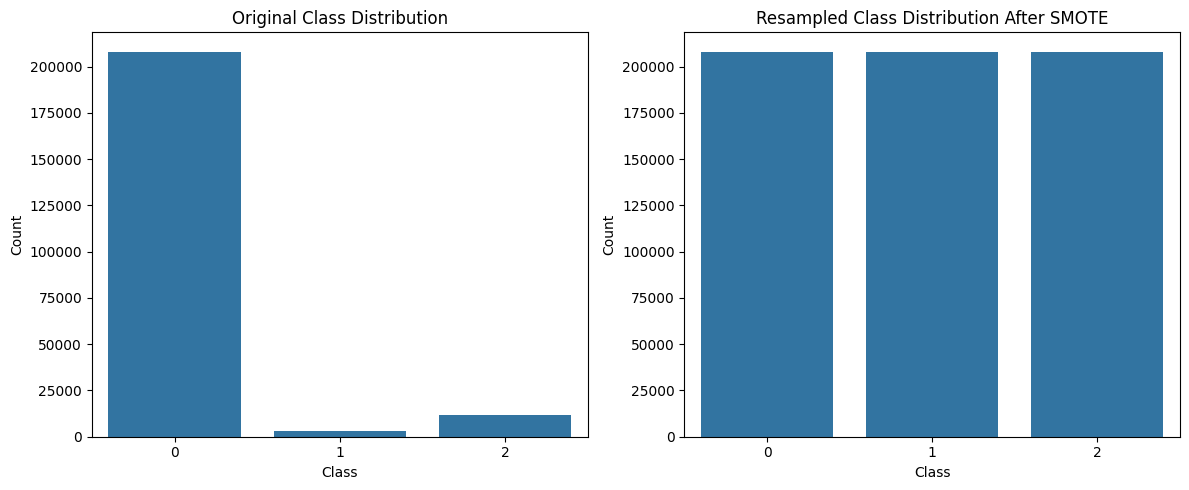

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_train is your original target variable before SMOTE
# and Y_resampled is your target variable after applying SMOTE.

# Count original class distribution
original_counts = Y_train.value_counts()
resampled_counts = Y_train_resampled.value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original distribution
sns.barplot(x=original_counts.index, y=original_counts.values, ax=axes[0])
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot resampled distribution
sns.barplot(x=resampled_counts.index, y=resampled_counts.values, ax=axes[1])
axes[1].set_title('Resampled Class Distribution After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


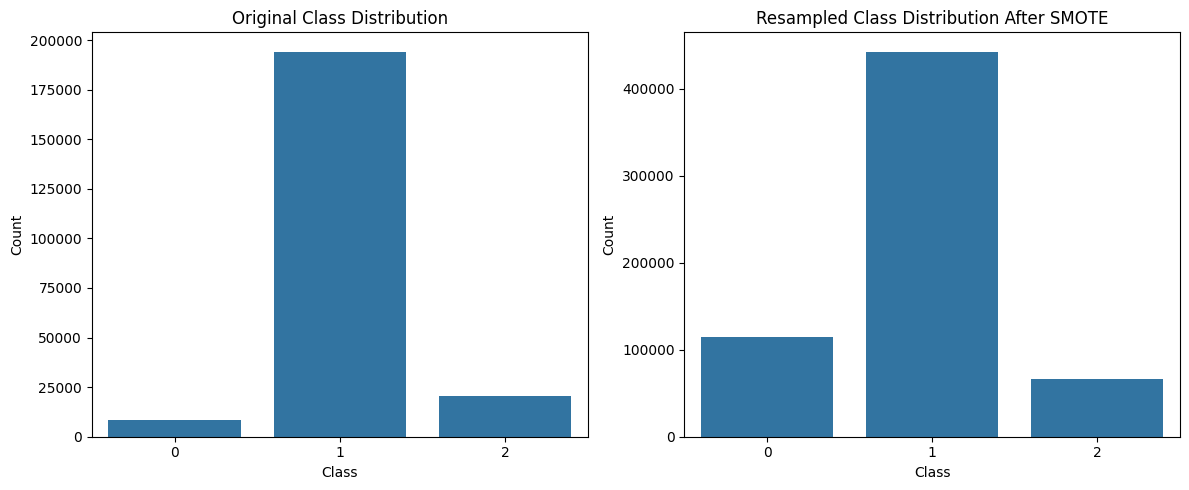

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Y_train is your original target variable before SMOTE
# and Y_resampled is your target variable after applying SMOTE.

# Count original class distribution
original_counts = X_train["Known_contact"].value_counts()
resampled_counts = X_train_resampled["Known_contact"].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original distribution
sns.barplot(x=original_counts.index, y=original_counts.values, ax=axes[0])
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot resampled distribution
sns.barplot(x=resampled_counts.index, y=resampled_counts.values, ax=axes[1])
axes[1].set_title('Resampled Class Distribution After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [39]:
mapping.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Age_60_above', 'Sex', 'Known_contact', 'Corona'],
      dtype='object')

In [40]:
ml_df.head()

,Test_date,Cough_symptoms_0.0,Cough_symptoms_1.0,Fever_0.0,Fever_1.0,Sore_throat_0.0,Sore_throat_1.0,Shortness_of_breath_0.0,Shortness_of_breath_1.0,Headache_0.0,Headache_1.0,Age_60_above_No,Age_60_above_Yes,Sex_female,Sex_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Corona
0,2020-03-11,0,1.0,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,negative
1,2020-03-11,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,positive
2,2020-03-11,1.0,0,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,positive
3,2020-03-11,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,negative
4,2020-03-11,0,1.0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,0,1.0,0,negative



Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.99      0.97     29743
       Other       0.00      0.00      0.00       499
    Positive       0.73      0.50      0.60      2396

    accuracy                           0.94     32638
   macro avg       0.56      0.50      0.52     32638
weighted avg       0.92      0.94      0.92     32638



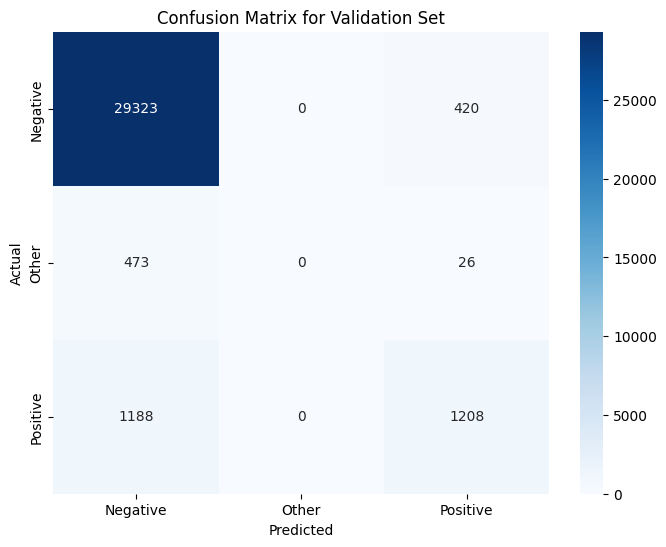

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare features (X) and target variable (y) for training and validation sets
X_train = train_set.drop(columns=['Test_date', 'Corona']) 
y_train = train_set['Corona']  

X_val = val_set.drop(columns=['Test_date', 'Corona']) 
y_val = val_set['Corona']

# Step 2: Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Set higher max_iter if convergence warnings occur
model.fit(X_train, y_train)

# Step 3: Make predictions on the validation set
y_pred = model.predict(X_val)

# Step 4: Evaluate the model
accuracy_logreg_no_smote_ohe = accuracy_score(y_val, y_pred)


# Step 5: Generate classification report
report = classification_report(y_val, y_pred, target_names=["Negative", "Other", "Positive"])
print("\nClassification Report:\n", report)

# Step 6: Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Other", "Positive"], yticklabels=["Negative", "Other", "Positive"])
plt.title('Confusion Matrix for Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


without SMOTE  accuracy increased while on regualar data it was giving appreciable accuracy

If the columns with 50% of missing data like, age above 60, sex, are skipped then also correlation remained same.

In [45]:
train_set['Corona']

136924    negative
60134     negative
134608    negative
49264     positive
37427     positive
            ...   
2273      negative
30110     negative
80218     negative
59360     positive
37222     negative
Name: Corona, Length: 130551, dtype: object

XGBoost Accuracy: 0.9405

XGBoost Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.99      0.97     29743
       Other       0.00      0.00      0.00       499
    Positive       0.76      0.57      0.65      2396

    accuracy                           0.94     32638
   macro avg       0.57      0.52      0.54     32638
weighted avg       0.92      0.94      0.93     32638



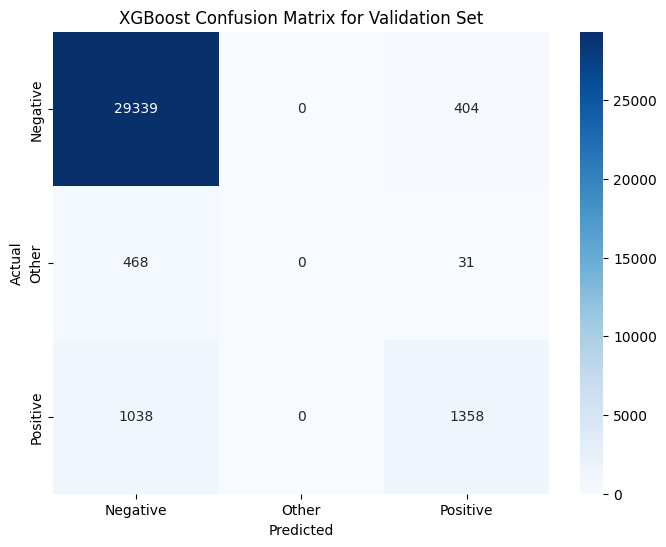

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Prepare features (X) and target variable (y) for training and validation sets
X_train = train_set.drop(columns=['Test_date', 'Corona']) 
y_train = train_set['Corona'].replace({"positive": 2, "other": 1, "negative": 0})

X_val = val_set.drop(columns=['Test_date', 'Corona']) 
y_val = val_set['Corona'].replace({"positive": 2, "other": 1, "negative": 0})

# Step 2: Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=123)
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Step 4: Evaluate the model
accuracy_xgb_no_smote_ohe = accuracy_score(y_val, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb_no_smote_ohe:.4f}')

# Step 5: Generate classification report
report_xgb = classification_report(y_val, y_pred_xgb, target_names=["Negative", "Other", "Positive"])
print("\nXGBoost Classification Report:\n", report_xgb)

# Step 6: Generate confusion matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Other", "Positive"], yticklabels=["Negative", "Other", "Positive"])
plt.title('XGBoost Confusion Matrix for Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Decision Tree Validation Accuracy: 0.4817

Decision Tree Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.46      0.62     29743
       Other       0.02      0.48      0.03       499
    Positive       0.41      0.81      0.55      2396

    accuracy                           0.48     32638
   macro avg       0.46      0.58      0.40     32638
weighted avg       0.91      0.48      0.60     32638



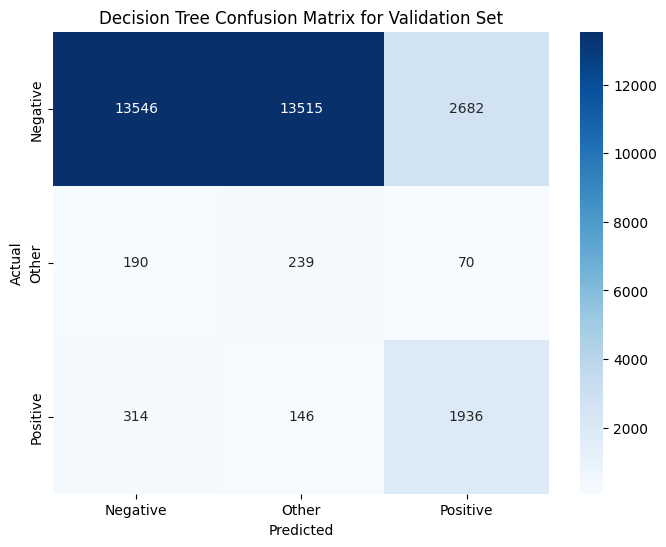

In [48]:
from sklearn.tree import DecisionTreeClassifier
X_train = train_set.drop(columns=['Test_date', 'Corona']) 
y_train = train_set['Corona']  

X_val = val_set.drop(columns=['Test_date', 'Corona']) 
y_val = val_set['Corona']

# Step 1: Create and train the Decision Tree model
dtree = DecisionTreeClassifier(random_state=123, class_weight='balanced')  # Adjust parameters as needed
dtree.fit(X_train, y_train)

# Step 2: Make predictions on the validation set
y_pred_dtree = dtree.predict(X_val)

# Step 3: Evaluate the model
accuracy_dtree = accuracy_score(y_val, y_pred_dtree)
print(f'Decision Tree Validation Accuracy: {accuracy_dtree:.4f}')

# Step 4: Generate classification report
report_dtree = classification_report(y_val, y_pred_dtree, target_names=["Negative", "Other", "Positive"])
print("\nDecision Tree Classification Report:\n", report_dtree)

# Step 5: Generate confusion matrix
cm_dtree = confusion_matrix(y_val, y_pred_dtree)

# Step 6: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Other", "Positive"], yticklabels=["Negative", "Other", "Positive"])
plt.title('Decision Tree Confusion Matrix for Validation Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

XGBoost Test Accuracy: 0.9717

XGBoost Classification Report for Test Set:
               precision    recall  f1-score   support

    Negative       0.97      1.00      0.99    111541
       Other       0.00      0.00      0.00      1420
    Positive       0.77      0.44      0.56      2698

    accuracy                           0.97    115659
   macro avg       0.58      0.48      0.51    115659
weighted avg       0.96      0.97      0.96    115659



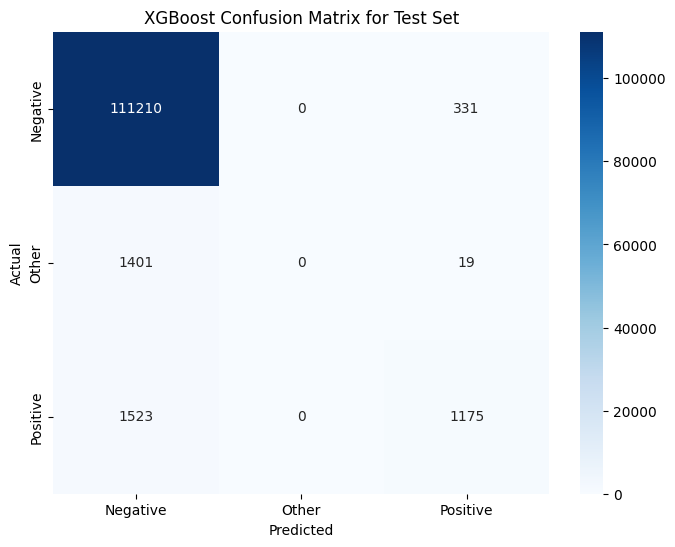

In [51]:
# Assuming you have a test_set ready
X_test = test_set.drop(columns=['Test_date', 'Corona']) 
y_test = test_set['Corona'].replace({"positive": 2, "other": 1, "negative": 0})

# Step 1: Make predictions on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

# Step 2: Evaluate the model on the test set
accuracy_xgb_test = accuracy_score(y_test, y_pred_test_xgb)
print(f'XGBoost Test Accuracy: {accuracy_xgb_test:.4f}')

# Step 3: Generate classification report for the test set
report_test_xgb = classification_report(y_test, y_pred_test_xgb, target_names=["Negative", "Other", "Positive"])
print("\nXGBoost Classification Report for Test Set:\n", report_test_xgb)

# Step 4: Generate confusion matrix for the test set
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

# Step 5: Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Other", "Positive"], yticklabels=["Negative", "Other", "Positive"])
plt.title('XGBoost Confusion Matrix for Test Set')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


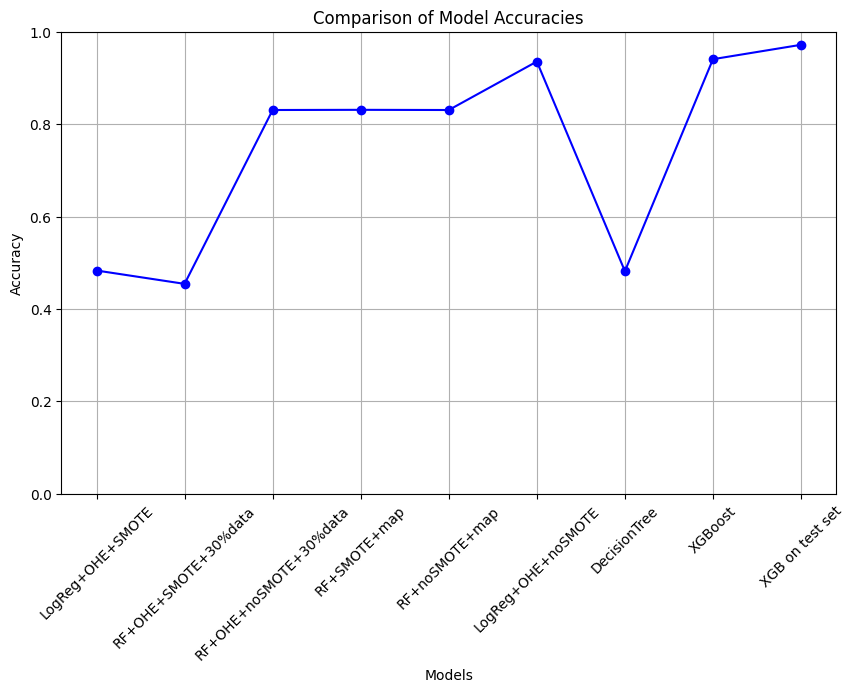

In [52]:
import matplotlib.pyplot as plt

# Step 1: Store the accuracy values in a dictionary
accuracies = {
    'LogReg+OHE+SMOTE': logreg_initial_accuracy,
    'RF+OHE+SMOTE+30%data': smote_rf_accuracy,
    'RF+OHE+noSMOTE+30%data': no_smote_rf_accuracy,
    'RF+SMOTE+map': mapped_smote_rf_accuracy,
    'RF+noSMOTE+map': no_smote_rf_accuracy,
    'LogReg+OHE+noSMOTE': accuracy_logreg_no_smote_ohe,
    'DecisionTree':accuracy_dtree,
    'XGBoost': accuracy_xgb_no_smote_ohe, 
    'XGB on test set' : accuracy_xgb_test

}

# Step 2: Extract keys and values for plotting
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Step 3: Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy_values, marker='o', linestyle='-', color='b', label='Model Accuracies')

# Step 4: Add labels and title
plt.xlabel('Models' )
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45) 
plt.ylim([0, 1])
plt.grid(True)


# Step 5: Display the plot
plt.show()


so it was inferred from above ML modelling :
1) SMOTE underperformed modelling
2) Logarithmic regression gave low performances with SMOTE rather without.
3) so does decision tree without SMOTE perfomed low 
4) Random Forest outperformed Logarithmic regression
5) XGboost perfomed well on train as well as test data 

        Importance of Accurate Disease Prediction
    Enhanced Patient Outcomes:

Timely Interventions: Accurate predictions enable healthcare providers to identify at-risk patients earlier, facilitating timely interventions that can significantly improve outcomes.

Personalized Treatment Plans: With precise predictions, treatments can be tailored to individual patients, taking into account their specific health profiles and risks like cancer prediction from variance in that body part or reports.

    Resource Optimization:

Efficient Resource Allocation: Accurate disease predictions can help healthcare systems allocate resources more effectively, ensuring that medical staff and equipment are available where they are needed most.

Reduction of Unnecessary Procedures: Predictive models can help in avoiding unnecessary diagnostic tests and treatments, thus saving costs and reducing patient exposure to invasive procedures.



        Impact on Medical Field

    Effective Screening:

Early Detection: Predictive models can enhance screening programs by identifying individuals at high risk for certain diseases, allowing for early detection and treatment.

Improved Screening Strategies: By analyzing patterns in data, predictive models can refine screening guidelines, making them more effective and targeted.

    Reducing Healthcare Burden:

Lower Hospitalization Rates: Accurate predictions can reduce the number of hospital admissions by managing chronic diseases more effectively in outpatient settings.

Cost Savings: By preventing disease progression through early detection and personalized treatment, healthcare systems can save substantial costs related to hospital stays and advanced treatments.

        Identifying Gaps:

Data Limitations: One significant gap in current knowledge is the availability and quality of data. Predictive models rely on comprehensive datasets, and gaps in data can limit the accuracy of predictions.

Understanding Disease Mechanisms: There is often a lack of understanding of the underlying mechanisms of various diseases, which can hinder the development of effective predictive models.

        Future Applications:

Adapting Models to Other Diseases: The methods developed for predicting one disease can often be adapted for others. For instance, techniques used in predicting diabetes can be repurposed to understand risk factors for cardiovascular diseases and cancer prediction. 

Integrating New Technologies: As new technologies and data sources (like genetic data, wearables, etc.) become available, the predictive models can be updated and refined, enhancing their utility across various health conditions.

SQL QUERIES

In [97]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,2020-03-11,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,2020-03-11,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,2020-03-11,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,2020-03-11,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [98]:

df_ = pd.concat([df["Ind_ID"], df1], axis=1)


In [120]:
df_.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,2020-03-11,True,False,True,False,False,No,female,Abroad,negative
1,2,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
2,3,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
3,4,2020-03-11,True,False,False,False,False,No,female,Abroad,negative
4,5,2020-03-11,True,False,False,False,False,No,female,Contact with confirmed,negative


In [74]:
#pip install duckdb

In [75]:
import duckdb

In [100]:
conn= duckdb.connect()
conn.register("df", df_)

In [101]:
conn.execute("select * from df").fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,1,2020-03-11,True,False,True,False,False,No,female,Abroad,negative
1,2,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
2,3,2020-03-11,False,True,False,False,False,No,female,Abroad,positive
3,4,2020-03-11,True,False,False,False,False,No,female,Abroad,negative
4,5,2020-03-11,True,False,False,False,False,No,female,Contact with confirmed,negative
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,False,False,False,False,False,No,male,Other,positive
278844,278845,2020-04-30,False,False,False,False,False,No,female,Other,negative
278845,278846,2020-04-30,False,False,False,False,False,No,male,Other,negative
278846,278847,2020-04-30,False,False,False,False,False,No,male,Other,negative


In [102]:
#1  Find the number of corona patients who faced shortness of breath.
query = "SELECT COUNT(*) AS patient_count FROM df WHERE Corona = 'positive' AND Shortness_of_breath = 'Yes' "
conn.execute(query).fetchdf()

,patient_count
0,1164


In [103]:
#2 Find the number of negative corona patients who have fever and sore_throat. 
query = " SELECT COUNT(*) AS patient_count FROM df WHERE Corona = 'negative' AND Fever = 'Yes' AND Sore_throat = 'Yes'"
conn.execute(query).fetchdf()

,patient_count
0,121


In [104]:
#3 Group the data by month and rank the number of positive cases.
query = " SELECT EXTRACT(YEAR FROM Test_date) AS Year, EXTRACT(MONTH FROM Test_date) AS Month, COUNT(*) AS Positive_Cases,RANK() OVER (ORDER BY COUNT(*) DESC) AS Rank FROM  df WHERE Corona = 'positive' GROUP BY Year, Month   ORDER BY RaNK"
conn.execute(query).fetchdf()

,Year,Month,Positive_Cases,Rank
0,2020,4,8881,1
1,2020,3,5848,2


In [109]:
#4 Find the female negative corona patients who faced cough and headache.
query = " SELECT * FROM DF WHERE Corona = 'negative' AND Sex = 'female' AND Cough_symptoms = 'Yes' AND Headache = 'Yes' limit 5"
conn.execute(query).fetchdf()
#LIMIT can be removed to fetch more detail

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,Corona
0,340,2020-03-12,True,True,False,False,True,No,female,Abroad,negative
1,493,2020-03-12,True,True,False,False,True,No,female,Other,negative
2,511,2020-03-12,True,False,False,False,True,No,female,Abroad,negative
3,936,2020-03-13,True,True,True,False,True,No,female,Abroad,negative
4,1113,2020-03-13,True,False,False,False,True,No,female,Abroad,negative


In [110]:
#5 How many elderly corona patients have faced breathing problems?
query = "SELECT COUNT(*) AS Elderly_With_Breathing_Problems FROM df WHERE Age_60_above = 'Yes'AND Corona = 'positive' AND Shortness_of_breath = 'Yes'"
conn.execute(query).fetchdf()

,Elderly_With_Breathing_Problems
0,263


In [111]:
#6 Which three symptoms were more common among COVID positive patients?
query = "SELECT SUM(CASE WHEN Cough_symptoms = 'Yes' THEN 1 ELSE 0 END) AS Cough_symptoms_count,SUM(CASE WHEN Fever = 'Yes' THEN 1 ELSE 0 END) AS Fever_count,SUM(CASE WHEN Sore_throat = 'Yes' THEN 1 ELSE 0 END) AS Sore_throat_count,SUM(CASE WHEN Shortness_of_breath = 'Yes' THEN 1 ELSE 0 END) AS Shortness_of_breath_count,SUM(CASE WHEN Headache = 'Yes' THEN 1 ELSE 0 END) AS Headache_count FROM df WHERE Corona = 'positive' "
conn.execute(query).fetchdf()

,Cough_symptoms_count,Fever_count,Sore_throat_count,Shortness_of_breath_count,Headache_count
0,6584.0,5559.0,1526.0,1164.0,2235.0


so rankwise symptoms were cough , fever , headache, sore throat, shortness of breath

In [137]:

negative_df = df_[df_["Corona"] == "negative"]
symptoms_counts_negative = negative_df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].apply(pd.Series.value_counts)

print(symptoms_counts_negative)
less_common_symptoms = symptoms_counts_negative.sum(axis=0).sort_values(ascending=True)

print("\nLess Common Symptom among COVID Negative Patients:")
print(less_common_symptoms.head(1))


       Cough_symptoms   Fever  Sore_throat  Shortness_of_breath  Headache
False          225240  244411       259861               259842    260079
True            34987   15816          366                  385       148

Less Common Symptom among COVID Negative Patients:
Cough_symptoms    260227
dtype: int64


In [126]:
import pandas as pd

# Assuming df_ is your DataFrame containing the relevant data

# Step 1: Filter the DataFrame
filtered_df = df_[
    (df_["Sex"] == "male") & 
    (df_["Known_contact"] == "Abroad") & 
    (df_["Corona"] == "positive")
]

# Step 2: Count the occurrences of each symptom
symptoms_counts = filtered_df[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].apply(pd.Series.value_counts)

# Display the counts for each symptom
print(symptoms_counts)

# To find the most common symptoms, you can sum the counts across the rows
most_common_symptoms = symptoms_counts.sum(axis=0).sort_values(ascending=False)

# Display the most common symptoms
print("\nMost Common Symptoms among COVID Positive Males with Known Contact Abroad:")
print(most_common_symptoms)


       Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
False             346    471          791                  794       749
True              532    407           87                   84       129

Most Common Symptoms among COVID Positive Males with Known Contact Abroad:
Cough_symptoms         878
Fever                  878
Sore_throat            878
Shortness_of_breath    878
Headache               878
dtype: int64


In [147]:
#8 What are the most common symptoms among COVID positive males whose known contact was abroad? 
query= "SELECT Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, COUNT(*) AS Count FROM df WHERE Corona = 'positive' AND Sex = 'male' AND Known_contact = 'Abroad' GROUP BY Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache ORDER BY Count DESC LIMIT 10"
conn.execute(query).fetchdf()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Count
0,True,False,False,False,False,189
1,True,True,False,False,False,186
2,False,False,False,False,False,170
3,False,True,False,False,False,85
4,True,True,False,False,True,28
5,False,False,False,False,True,23
6,True,True,False,True,False,22
7,True,True,True,False,False,21
8,True,False,False,False,True,21
9,False,True,False,False,True,19


ANSWER 8  implies out of given data cough and fever were common followed by people having none of claimed symptoms depicting insufficient data.

        If more data and features are sourced out we can get more accurate results that can help predict medical condtition more accurately 
        avoiding Type 2 error . 